<a href="https://colab.research.google.com/github/lucius-yu/colab-tutorial/blob/master/fashion_mnist_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading fashion minst dataset

In [1]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.fashion_mnist

# load train and test images
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


show example image and label

9
0 255


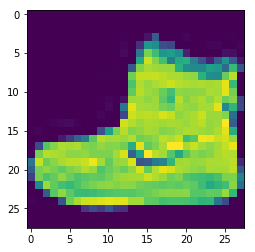

In [2]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(np.min(training_images[0]), np.max(training_images[0]))

The pixel value is range in [0, 255]. We do normalization first

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

split training data to train and validation

In [0]:
data_size=training_images.shape[0]
train_size=int(np.floor(data_size*0.6))

print(data_size)
print(train_size)
indices = np.random.permutation(data_size)
train_idx, valid_idx = indices[:train_size], indices[train_size:]

train_images, train_labels = training_images[train_idx,:], training_labels[train_idx]
valid_images, valid_labels = training_images[valid_idx,:], training_labels[valid_idx]

print(train_images.shape)
print(valid_images.shape)

60000
48000
(48000, 28, 28)
(12000, 28, 28)


Now, we build a simple DNN model

In [0]:
# build the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# save the initial weights for reset model later on
initial_weights = model.get_weights()


Train the model with validation

In [15]:
# reset model to initial_weights
model.set_weights(initial_weights)

# train the model
num_epochs=20
history=model.fit(training_images, training_labels, validation_split=0.4, epochs=num_epochs)

Train on 36000 samples, validate on 24000 samples
Epoch 1/20
36000/36000 [==============================] - 4s 98us/sample - loss: 0.7295 - acc: 0.7539 - val_loss: 0.5322 - val_acc: 0.8140
Epoch 2/20
36000/36000 [==============================] - 3s 96us/sample - loss: 0.5041 - acc: 0.8218 - val_loss: 0.4971 - val_acc: 0.8222
Epoch 3/20
36000/36000 [==============================] - 3s 96us/sample - loss: 0.4590 - acc: 0.8363 - val_loss: 0.4882 - val_acc: 0.8278
Epoch 4/20
36000/36000 [==============================] - 3s 95us/sample - loss: 0.4374 - acc: 0.8447 - val_loss: 0.4425 - val_acc: 0.8460
Epoch 5/20
36000/36000 [==============================] - 3s 97us/sample - loss: 0.4235 - acc: 0.8485 - val_loss: 0.4333 - val_acc: 0.8505
Epoch 6/20
36000/36000 [==============================] - 4s 98us/sample - loss: 0.4107 - acc: 0.8529 - val_loss: 0.4267 - val_acc: 0.8519
Epoch 7/20
36000/36000 [==============================] - 4s 108us/sample - loss: 0.4043 - acc: 0.8569 - val_loss: 0

In [8]:
print(history.history)

{'loss': [2.1611058446036444, 1.8212217234505548, 1.6119716126124064, 1.4610309033923679, 1.340398692448934, 1.245968283812205, 1.1674902721510994, 1.0679906297789679, 0.9948119518491957, 0.9416476040946112], 'acc': [0.22422223, 0.43166667, 0.50794446, 0.56408334, 0.5948333, 0.616, 0.6352222, 0.6512778, 0.6695833, 0.6805], 'val_loss': [1.9556491489410401, 1.6982994864781698, 1.527205774307251, 1.3909597997665406, 1.2854987439314525, 1.2005858895778656, 1.1191701392332714, 1.0224677602450052, 0.9630629527568817, 0.9161171787579855], 'val_acc': [0.39245832, 0.46175, 0.53758335, 0.578875, 0.60279167, 0.6267083, 0.6435, 0.667125, 0.68075, 0.6899167]}


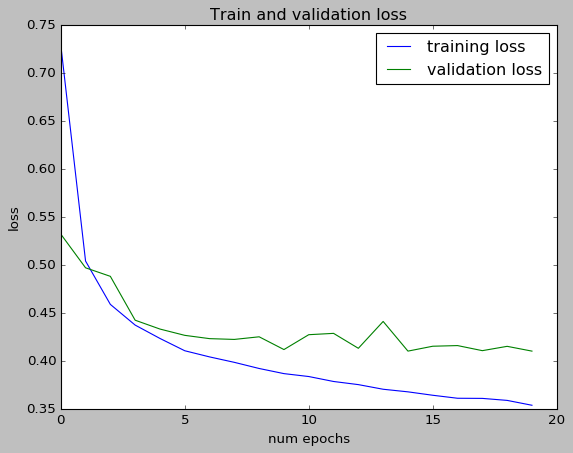

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('classic')

plt.plot(range(num_epochs), history.history['loss'], label="training loss")
plt.plot(range(num_epochs), history.history['val_loss'], label="validation loss")

plt.xlabel("num epochs")
plt.ylabel("loss")
plt.title("Train and validation loss")
plt.legend()
plt.show()

Evaluate the model

In [18]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.4416 - acc: 0.8467


[0.4416315574645996, 0.8467]

A wider model

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 5s 113us/sample - loss: 0.5163 - acc: 0.8155 - val_loss: 0.4668 - val_acc: 0.8299
Epoch 2/20
45000/45000 [==============================] - 5s 106us/sample - loss: 0.3825 - acc: 0.8589 - val_loss: 0.3746 - val_acc: 0.8610
Epoch 3/20
45000/45000 [==============================] - 5s 105us/sample - loss: 0.3433 - acc: 0.8717 - val_loss: 0.3948 - val_acc: 0.8552
Epoch 4/20
45000/45000 [==============================] - 5s 107us/sample - loss: 0.3146 - acc: 0.8838 - val_loss: 0.3352 - val_acc: 0.8808
Epoch 5/20
45000/45000 [==============================] - 5s 121us/sample - loss: 0.2968 - acc: 0.8892 - val_loss: 0.3478 - val_acc: 0.8741
Epoch 6/20
45000/45000 [==============================] - 5s 116us/sample - loss: 0.2804 - acc: 0.8954 - val_loss: 0.3419 - val_acc: 0.8801
Epoch 7/20
45000/45000 [==============================] - 5s 105us/sample - loss: 0.2666 - acc: 0.9003 - val_l

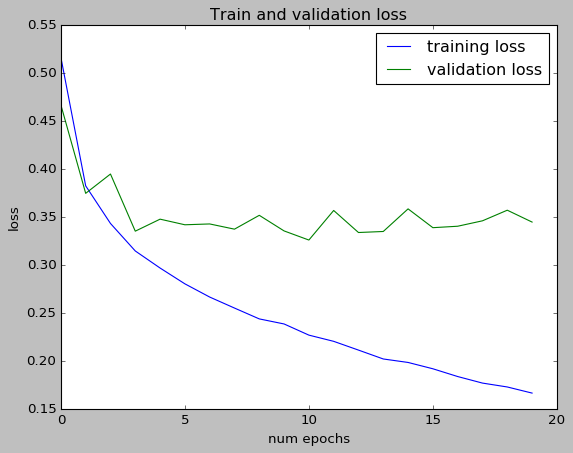

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3867 - acc: 0.8845


[0.38673659170866015, 0.8845]

In [58]:
# build the model
model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model_2.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.0005),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# train the model
num_epochs=20
history=model_2.fit(training_images, training_labels, validation_split=0.25, epochs=num_epochs)

plt.plot(range(num_epochs), history.history['loss'], label="training loss")
plt.plot(range(num_epochs), history.history['val_loss'], label="validation loss")

plt.xlabel("num epochs")
plt.ylabel("loss")
plt.title("Train and validation loss")
plt.legend()
plt.show()

model_2.evaluate(test_images, test_labels)

Using callback to implement early stopping

Train on 45000 samples, validate on 15000 samples
Epoch 1/40
45000/45000 [==============================] - 5s 114us/sample - loss: 0.5449 - acc: 0.8091 - val_loss: 0.4366 - val_acc: 0.8455
Epoch 2/40
45000/45000 [==============================] - 5s 114us/sample - loss: 0.3887 - acc: 0.8606 - val_loss: 0.3964 - val_acc: 0.8540
Epoch 3/40
45000/45000 [==============================] - 5s 116us/sample - loss: 0.3446 - acc: 0.8750 - val_loss: 0.3599 - val_acc: 0.8702
Epoch 4/40
45000/45000 [==============================] - 5s 103us/sample - loss: 0.3202 - acc: 0.8814 - val_loss: 0.3421 - val_acc: 0.8756
Epoch 5/40
45000/45000 [==============================] - 5s 102us/sample - loss: 0.2993 - acc: 0.8905 - val_loss: 0.3282 - val_acc: 0.8797
Epoch 6/40
45000/45000 [==============================] - 5s 102us/sample - loss: 0.2843 - acc: 0.8947 - val_loss: 0.3229 - val_acc: 0.8853
Epoch 7/40
45000/45000 [==============================] - 5s 102us/sample - loss: 0.2681 - acc: 0.9007 - val_l

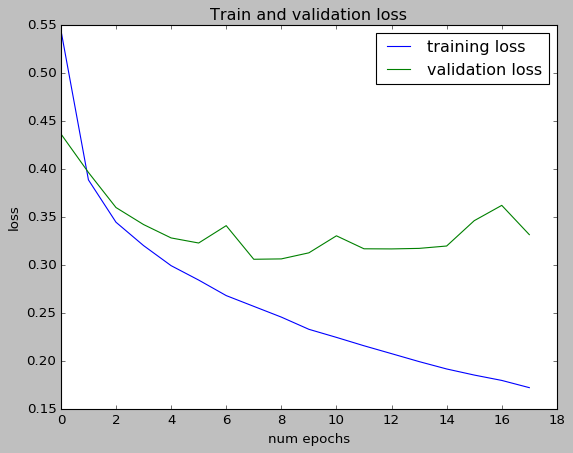

10000/10000 [==============================] - 1s 71us/sample - loss: 0.3391 - acc: 0.8793


[0.33907311239242555, 0.8793]

In [60]:
callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True),
]


# build the model
model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model_2.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.0005),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# train the model
num_epochs=40
history=model_2.fit(training_images, training_labels, validation_split=0.25,callbacks=callbacks, epochs=num_epochs)

plt.plot(range(len(history.history['loss'])), history.history['loss'], label="training loss")
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label="validation loss")

plt.xlabel("num epochs")
plt.ylabel("loss")
plt.title("Train and validation loss")
plt.legend()
plt.show()

model_2.evaluate(test_images, test_labels)

Train on 45000 samples, validate on 15000 samples
Epoch 1/40
45000/45000 [==============================] - 6s 124us/sample - loss: 0.5412 - acc: 0.8113 - val_loss: 0.4127 - val_acc: 0.8562
Epoch 2/40
45000/45000 [==============================] - 5s 112us/sample - loss: 0.3872 - acc: 0.8636 - val_loss: 0.4090 - val_acc: 0.8537
Epoch 3/40
45000/45000 [==============================] - 5s 110us/sample - loss: 0.3502 - acc: 0.8729 - val_loss: 0.3619 - val_acc: 0.8693
Epoch 4/40
45000/45000 [==============================] - 6s 123us/sample - loss: 0.3255 - acc: 0.8822 - val_loss: 0.3454 - val_acc: 0.8755
Epoch 5/40
45000/45000 [==============================] - 6s 128us/sample - loss: 0.3034 - acc: 0.8900 - val_loss: 0.3551 - val_acc: 0.8729
Epoch 6/40
45000/45000 [==============================] - 5s 111us/sample - loss: 0.2883 - acc: 0.8962 - val_loss: 0.3294 - val_acc: 0.8816
Epoch 7/40
45000/45000 [==============================] - 5s 112us/sample - loss: 0.2763 - acc: 0.9005 - val_l

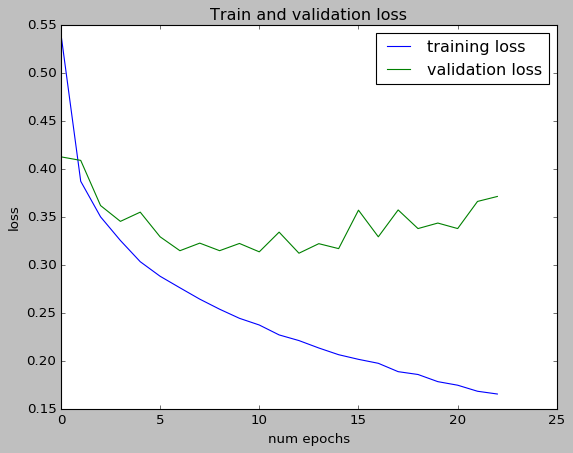

10000/10000 [==============================] - 1s 67us/sample - loss: 0.3405 - acc: 0.8854


[0.3404500060558319, 0.8854]

In [61]:
callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True),
]


# build the model
model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.L1L2(0,1e-5), activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.L1L2(0,1e-5), activation=tf.nn.relu),  
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model_2.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.0005),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# train the model
num_epochs=40
history=model_2.fit(training_images, training_labels, validation_split=0.25,callbacks=callbacks, epochs=num_epochs)

plt.plot(range(len(history.history['loss'])), history.history['loss'], label="training loss")
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label="validation loss")

plt.xlabel("num epochs")
plt.ylabel("loss")
plt.title("Train and validation loss")
plt.legend()
plt.show()

model_2.evaluate(test_images, test_labels)